# Project Overview

This project is for making prediction on whether a person will suffer from the Heart disease or not.
The dataset is from 'Kaggle'.
The dataset contains 14 columns, including the target column, which indicates the presence or absence of heart disease. Here is a brief description of each column:

    age: Age of the patient in years.
    sex: Sex of the patient. 1 = male, 0 = female.
    cp: Chest pain type experienced by the patient. There are four types:

    0 = typical angina
    1 = atypical angina
    2 = non-anginal pain
    3 = asymptomatic

    trestbps: Resting blood pressure (in mm Hg) when the patient was admitted to the hospital.
    chol: Serum cholesterol level (in mg/dl) when the patient was admitted to the hospital.
    fbs: Fasting blood sugar level (> 120 mg/dl or not). 1 = true, 0 = false.
    restecg: Resting electrocardiographic results. There are three possible values:

    0 = normal
    1 = ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

    thalach: Maximum heart rate achieved during exercise.
    exang: Exercise-induced angina. 1 = yes, 0 = no.
    oldpeak: ST depression induced by exercise relative to rest.
    slope: The slope of the peak exercise ST segment. There are three possible values:

    0 = upsloping
    1 = flat
    2 = downsloping

    ca: Number of major vessels (0-3) colored by fluoroscopy.
    thal: A blood disorder called thalassemia. There are three possible values:

    1 = normal
    2 = fixed defect
    3 = reversible defect

    target: Presence of heart disease in the patient. 1 = yes, 0 = no.

The goal of the dataset is to use the patient information to predict whether a patient has heart disease.

In [1]:
# Import necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Set up the default format of the displayed output
pd.options.display.max_rows = 10

pd.options.display.float_format = "{:.3f}".format

In [2]:
# Load data 

df = pd.read_csv(r'D:\SUGANYA\github\Heart Disease Prediction\dataset.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Data manipulation

Example steps include:
1. Handle missing or invalid data, remove duplicates, and fix data formatting issues using functions such as dropna(), fillna(), drop_duplicates(), str.strip(), and str.replace()
1. Taking relevant columns
2. Changing 'object' data type
3. Define on index

In [5]:
# Check for null values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
           ..
oldpeak     0
slope       0
ca          0
thal        0
target      0
Length: 14, dtype: int64

In [6]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates.any())

True


In [7]:
df.drop_duplicates().reset_index(drop=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


### Data Visualization

In [8]:
df_vis = df.copy()

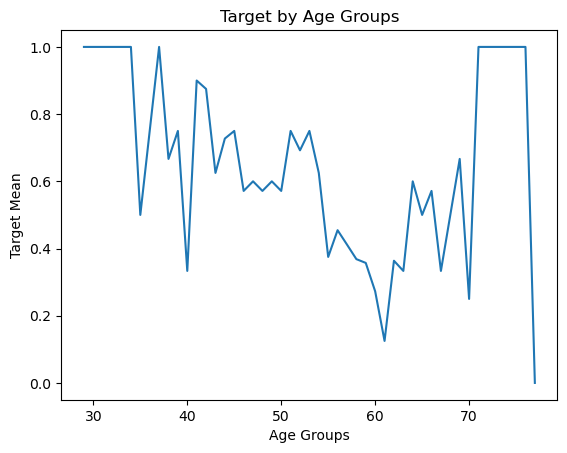

In [9]:
df_vis.groupby('age')['target'].mean().plot(kind='line')
plt.xlabel('Age Groups')
plt.ylabel('Target Mean')
plt.title('Target by Age Groups')
plt.show()

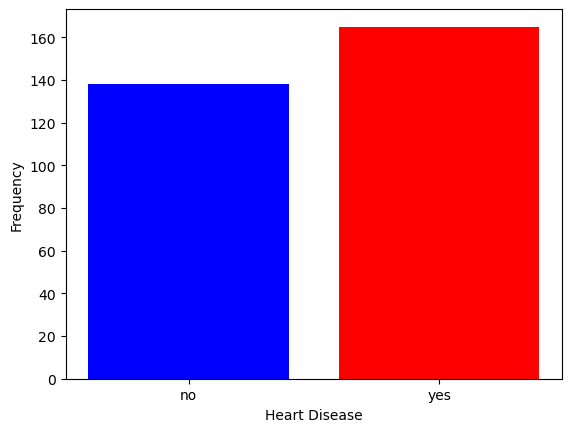

In [10]:
counts = df_vis['target'].value_counts()
plt.bar(counts.index,counts.values,color=['red','blue'])
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.xticks([0,1],['no','yes'])
plt.show()

<Axes: xlabel='age', ylabel='thalach'>

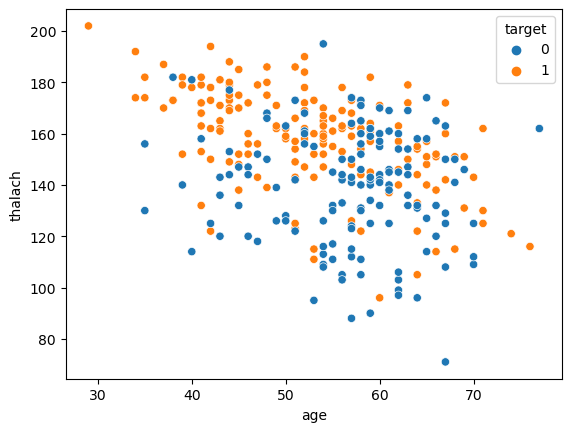

In [11]:
sns.scatterplot(data=df_vis,x='age',y='thalach',hue='target')

([<matplotlib.axis.XTick at 0x27d3bcc6520>,
 [Text(1, 0, 'Female'), Text(2, 0, 'Male')])

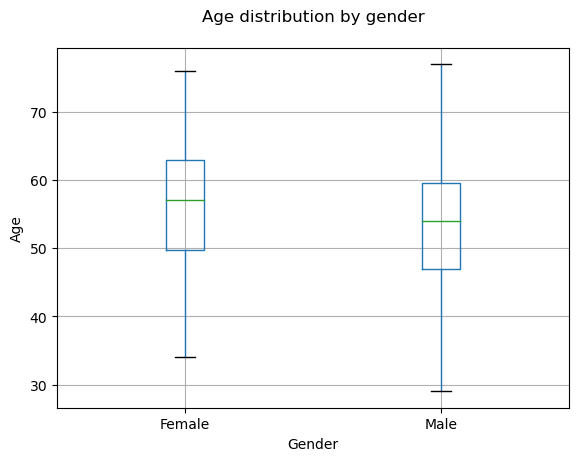

In [12]:
df_vis.boxplot(column='age',by='sex')

plt.title('')
plt.suptitle("Age distribution by gender")
plt.xlabel('Gender')
plt.ylabel('Age')
plt.xticks([1,2],['Female','Male'])

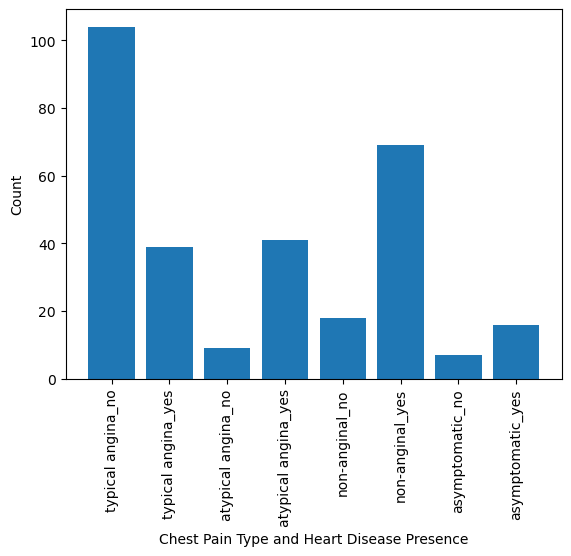

In [13]:
cp_target = df_vis.groupby(['cp', 'target']).size().reset_index(name='count')
plt.bar(cp_target['cp'].astype(str) + cp_target['target'].astype(str), cp_target['count'])
plt.xlabel('Chest Pain Type and Heart Disease Presence')
plt.ylabel('Count')
plt.xticks(['00','01','10','11','20','21','30','31'],['typical angina_no','typical angina_yes','atypical angina_no','atypical angina_yes',
                                      'non-anginal_no','non-anginal_yes','asymptomatic_no','asymptomatic_yes'],rotation=90)
                                      
'''
0 = typical angina
1 = atypical angina
2 = non-anginal pain
3 = asymptomatic

'''                                      


plt.show()

'\ncolor map:\n    viridis: A color map that ranges from deep blue to bright yellow.\n    plasma: A color map that ranges from dark purple to bright pink.\n    magma: A color map that ranges from deep purple to bright orange.\n    inferno: A color map that ranges from deep blue to bright orange.\n    jet: A color map that ranges from dark blue to bright red.\n    cool: A color map that ranges from dark blue to light blue.\n    hot: A color map that ranges from black to bright red.\n'

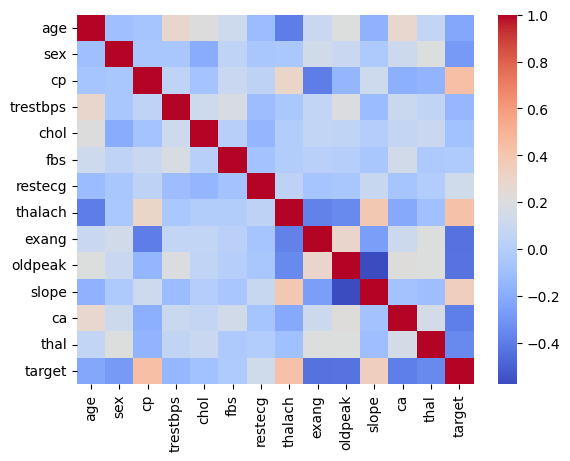

In [14]:
corr_matrix = df_vis.corr()
sns.heatmap(corr_matrix,annot=False,cmap='coolwarm')
'''
color map:
    viridis: A color map that ranges from deep blue to bright yellow.
    plasma: A color map that ranges from dark purple to bright pink.
    magma: A color map that ranges from deep purple to bright orange.
    inferno: A color map that ranges from deep blue to bright orange.
    jet: A color map that ranges from dark blue to bright red.
    cool: A color map that ranges from dark blue to light blue.
    hot: A color map that ranges from black to bright red.
'''

<Axes: xlabel='target', ylabel='age'>

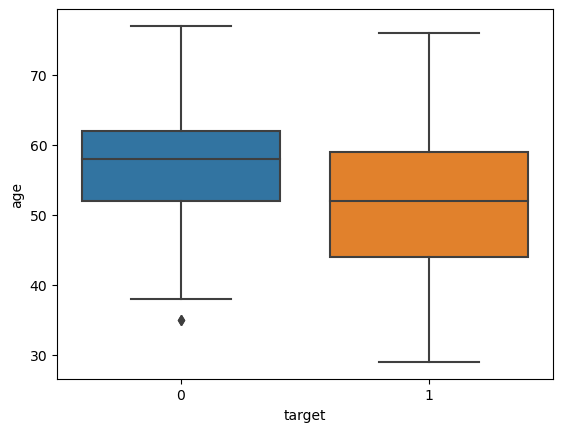

In [15]:
sns.boxplot(x='target',y='age',data=df_vis)


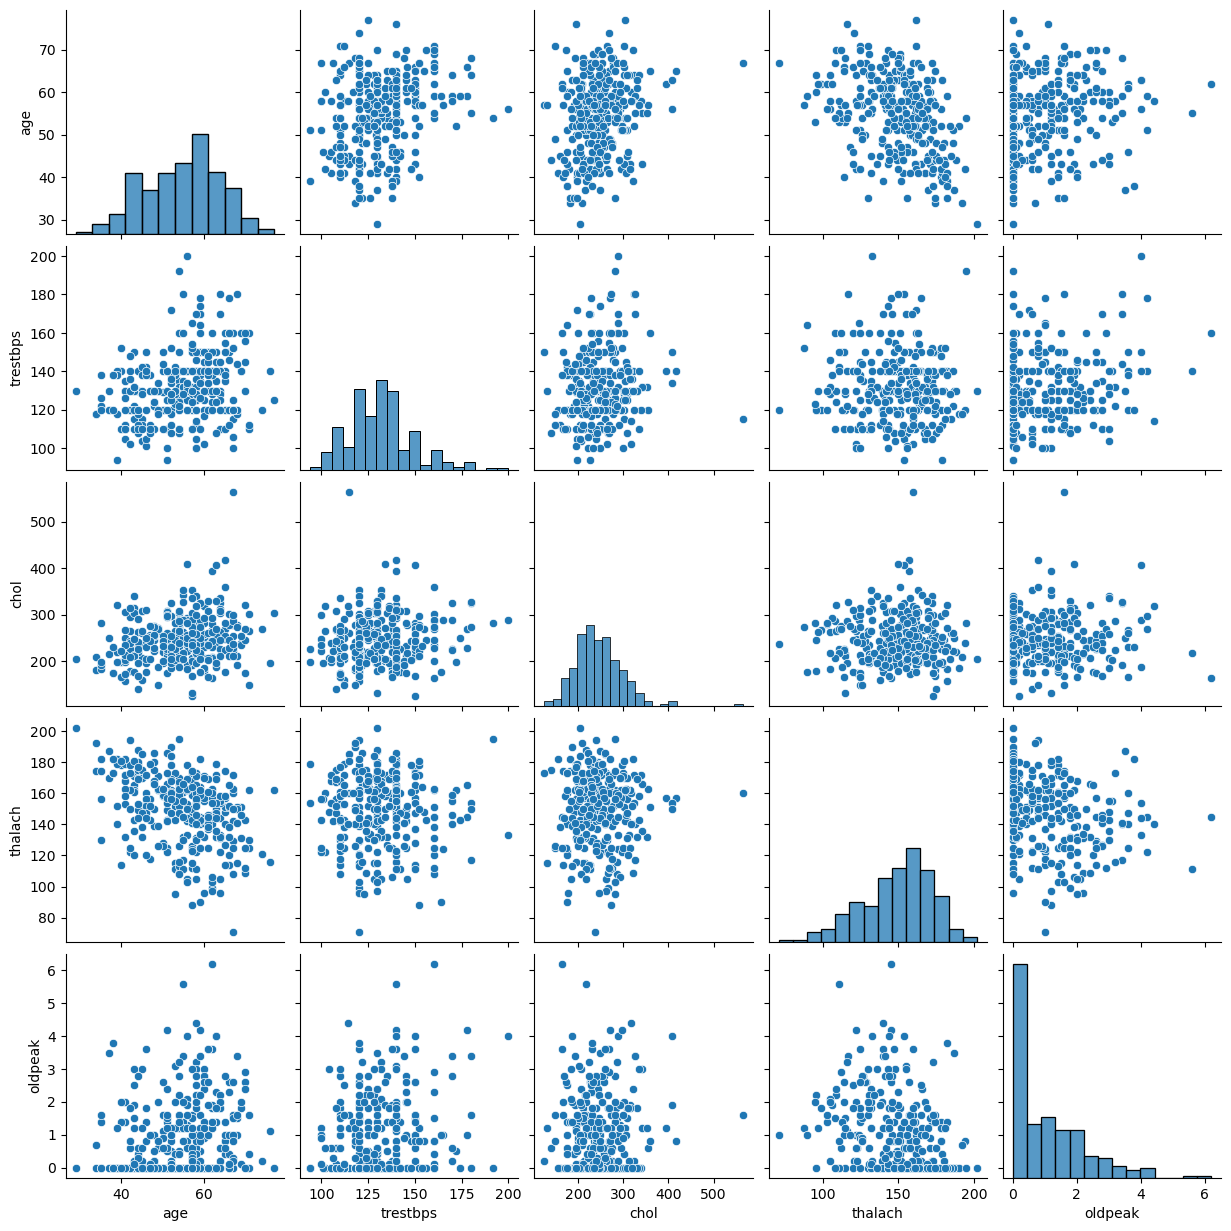

In [16]:
# select the variables to include in the pair plot
vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# create a pair plot of the selected variables
sns.pairplot(df[vars], diag_kind='hist')
plt.show()

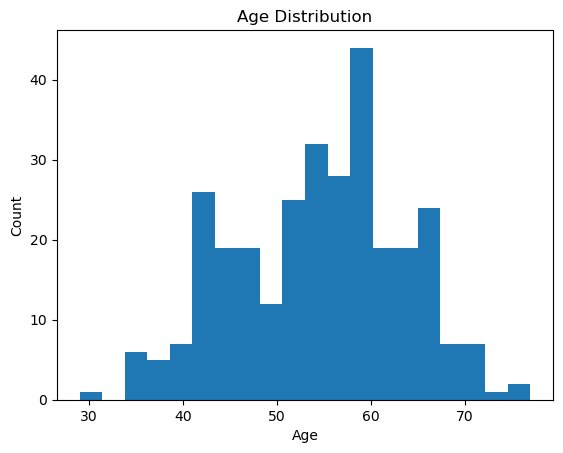

In [17]:
# create histograms of selected variables
plt.hist(df_vis['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Prediction Model

#### Data Preparation

In [18]:
# Scaling
# continuous var: trestbps chol thalach oldpeak

subset = df[['trestbps','chol','thalach','oldpeak']]


In [19]:
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
scaled_subset = scaler.fit_transform(subset)
scaled_df = pd.DataFrame(scaled_subset,columns=['trestbps','chol','thalach','oldpeak'])
df[['trestbps','chol','thalach','oldpeak']] = scaled_df[['trestbps','chol','thalach','oldpeak']]
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3     0.481 0.244    1        0    0.603      0    0.371   
1     37    1   2     0.340 0.283    0        1    0.885      0    0.565   
2     41    0   1     0.340 0.178    0        0    0.771      0    0.226   
3     56    1   1     0.245 0.251    0        1    0.817      0    0.129   
4     57    0   0     0.245 0.521    0        1    0.702      1    0.097   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0     0.434 0.263    0        1    0.397      1    0.032   
299   45    1   3     0.151 0.315    0        1    0.466      0    0.194   
300   68    1   0     0.472 0.153    1        1    0.534      0    0.548   
301   57    1   0     0.340 0.011    0        1    0.336      1    0.194   
302   57    0   1     0.340 0.251    0        0    0.786      0    0.000   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [21]:
# Feature Selection

n = 8
corr_matrix = df.corr()
top_n = corr_matrix['target'].sort_values(ascending=False)[:n].index.tolist()
final_df = df[top_n]
final_df

,target,cp,thalach,slope,restecg,fbs,chol,trestbps
0,1,3,0.603,0,0,1,0.244,0.481
1,1,2,0.885,0,1,0,0.283,0.340
2,1,1,0.771,2,0,0,0.178,0.340
3,1,1,0.817,2,1,0,0.251,0.245
4,1,0,0.702,2,1,0,0.521,0.245
...,...,...,...,...,...,...,...,...
298,0,0,0.397,1,1,0,0.263,0.434
299,0,3,0.466,1,1,0,0.315,0.151
300,0,0,0.534,1,1,1,0.153,0.472
301,0,0,0.336,1,1,0,0.011,0.340


In [22]:
# One-Hot Encoding

temp=df.copy()

chest_pain_type = pd.get_dummies(temp['cp'])

temp = pd.concat([temp,chest_pain_type],axis=1)

temp = temp.drop(['cp'],axis=1)

temp = temp.rename(columns={0:'cp_typ_ang',1:'cp_atyp_ang',2:'cp_non-ang',3:'cp_asympt'})


temp

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_typ_ang,cp_atyp_ang,cp_non-ang,cp_asympt
0,63,1,0.481,0.244,1,0,0.603,0,0.371,0,0,1,1,0,0,0,1
1,37,1,0.340,0.283,0,1,0.885,0,0.565,0,0,2,1,0,0,1,0
2,41,0,0.340,0.178,0,0,0.771,0,0.226,2,0,2,1,0,1,0,0
3,56,1,0.245,0.251,0,1,0.817,0,0.129,2,0,2,1,0,1,0,0
4,57,0,0.245,0.521,0,1,0.702,1,0.097,2,0,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0.434,0.263,0,1,0.397,1,0.032,1,0,3,0,1,0,0,0
299,45,1,0.151,0.315,0,1,0.466,0,0.194,1,0,3,0,0,0,0,1
300,68,1,0.472,0.153,1,1,0.534,0,0.548,1,2,3,0,1,0,0,0
301,57,1,0.340,0.011,0,1,0.336,1,0.194,1,1,3,0,1,0,0,0


In [23]:
final_df = pd.concat([final_df,temp[['cp_typ_ang','cp_atyp_ang','cp_non-ang','cp_asympt']]],axis=1)
final_df.drop(['cp'],axis=1,inplace=True)

In [24]:
X = final_df.drop('target',axis=1)
y = final_df['target']

In [25]:
# Gradient Boosting


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting model and fit to the training data
gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the testing data and compute accuracy score
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Accuracy: {:.2f}%".format(accuracy*100))

Gradient Boosting Accuracy: 83.61%


In [26]:
# Support Vector Machine

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a SVM model and fit to the training data
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the testing data and compute accuracy score
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy: {:.2f}%".format(accuracy*100))

SVM Accuracy: 83.61%


In [27]:
# Random Forest

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model and fit to the training data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the testing data and compute accuracy score
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(accuracy*100))

Random Forest Accuracy: 81.97%


In [28]:
# Logistic Regression
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model and fit to the training data
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predict on the testing data and compute accuracy score
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy*100))

Logistic Regression Accuracy: 80.33%


In [29]:
# K Nearest Neighbor

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the model using the training data
knn.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy*100)

Accuracy: 75.40983606557377
